<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/Classification/Covertype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
!pip install --upgrade category_encoders



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Prepare dataset

In [14]:
covertype_dataset = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/Classification/sources/covtype.data")

strOfNames = ["Elevation" , "Aspect" , "Slope" , "Horizontal_Distance_To_Hydrology" , "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways" , "Hillshade_9am" , "Hillshade_Noon" , "Hillshade_3pm" , "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  strOfNames.append("Wilderness_Area" + str(i+1))
for i in range(40):
  strOfNames.append("Soil_type" + str(i+1))
strOfNames.append("Cover_type")

covertype_dataset.columns = strOfNames

In [15]:
input_vector = strOfNames[0:54]
print(input_vector)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_type1', 'Soil_type2', 'Soil_type3', 'Soil_type4', 'Soil_type5', 'Soil_type6', 'Soil_type7', 'Soil_type8', 'Soil_type9', 'Soil_type10', 'Soil_type11', 'Soil_type12', 'Soil_type13', 'Soil_type14', 'Soil_type15', 'Soil_type16', 'Soil_type17', 'Soil_type18', 'Soil_type19', 'Soil_type20', 'Soil_type21', 'Soil_type22', 'Soil_type23', 'Soil_type24', 'Soil_type25', 'Soil_type26', 'Soil_type27', 'Soil_type28', 'Soil_type29', 'Soil_type30', 'Soil_type31', 'Soil_type32', 'Soil_type33', 'Soil_type34', 'Soil_type35', 'Soil_type36', 'Soil_type37', 'Soil_type38', 'Soil_type39', 'Soil_type40']


In [16]:
#plot = plt.scatter(,covertype_dataset["Elevation"])
covertype_dataset.describe()
#seaborn.displot(covertype_dataset , x = "Elevation")
#seaborn.displot(covertype_dataset , x = "Aspect")
#seaborn.displot(covertype_dataset , x = "Slope")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Hydrology")
#seaborn.displot(covertype_dataset , x = "Vertical_Distance_To_Hydrology")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Roadways")
#seaborn.displot(covertype_dataset , x = "Hillshade_9am")
#seaborn.displot(covertype_dataset , x = "Hillshade_Noon")
#seaborn.displot(covertype_dataset , x = "Hillshade_3pm")
#seaborn.displot(covertype_dataset , x = "Horizontal_Distance_To_Fire_Points")
covertype_dataset["Cover_type"].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: Cover_type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text major ticklabel objects>)

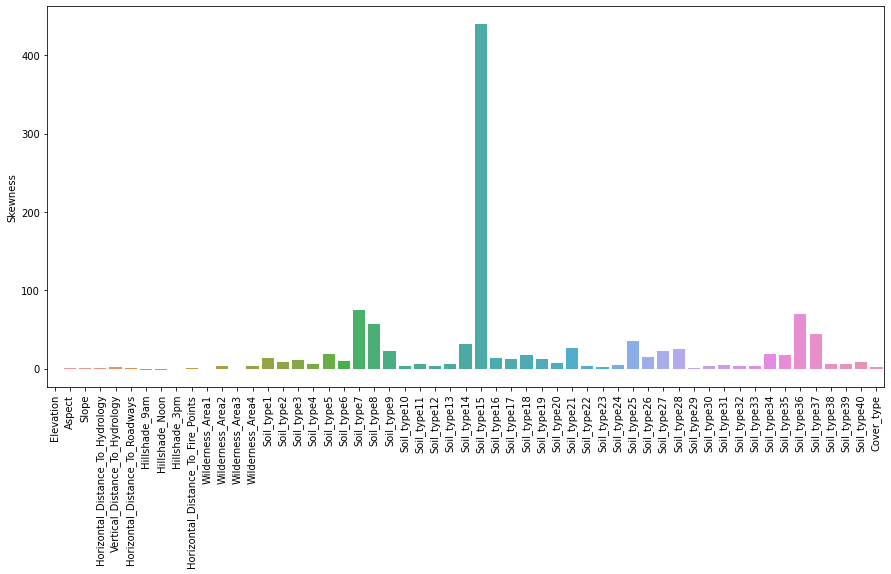

In [17]:
skew=covertype_dataset.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

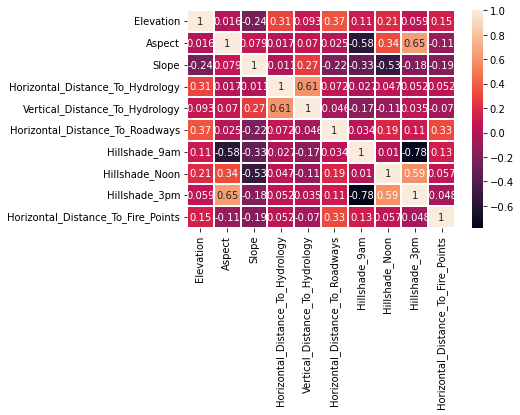

In [24]:
cont_data=covertype_dataset.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
sns.heatmap(cont_data.corr(),linewidths=1,annot=True)

First model : no data manipulation

trzeba wywalic niektore mocno skorelowane zmienne 

In [18]:
x = covertype_dataset[input_vector]
y = covertype_dataset["Cover_type"]

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

y_test.value_counts()


2    28465
1    21134
3     3539
7     2010
6     1760
5      894
4      300
Name: Cover_type, dtype: int64

In [6]:
model = LogisticRegression(class_weight = 'balanced' , solver='liblinear')
model.fit(x_train , y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [7]:
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.698     0.661     0.679     21108
           2      0.760     0.688     0.722     28514
           3      0.630     0.712     0.669      3523
           4      0.384     0.678     0.490       258
           5      0.158     0.442     0.233       953
           6      0.346     0.471     0.399      1738
           7      0.544     0.765     0.636      2008

    accuracy                          0.672     58102
   macro avg      0.503     0.631     0.547     58102
weighted avg      0.698     0.672     0.682     58102



Data normalization

In [8]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)
df = pd.DataFrame(x_scaled)
df.describe()

[[0.36568284 0.15555556 0.03030303 ... 0.         0.         0.        ]
 [0.47273637 0.38611111 0.13636364 ... 0.         0.         0.        ]
 [0.46323162 0.43055556 0.27272727 ... 0.         0.         0.        ]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.         0.         0.        ]
 [0.26263132 0.47222222 0.22727273 ... 0.         0.         0.        ]
 [0.26213107 0.45833333 0.1969697  ... 0.         0.         0.        ]]


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.550458,0.432381,0.213693,0.192862,0.283487,0.330216,0.835221,0.879207,0.561135,0.276075,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.140062,0.310871,0.113458,0.152147,0.075317,0.219089,0.105393,0.077830,0.150687,0.184607,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475238,0.161111,0.136364,0.077309,0.232558,0.155403,0.779528,0.838583,0.468504,0.142758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.568784,0.352778,0.196970,0.156049,0.262274,0.280596,0.858268,0.889764,0.562992,0.238394,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.652326,0.722222,0.272727,0.274875,0.312661,0.467613,0.909449,0.933071,0.661417,0.355500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Second model - normalized data


In [9]:
x_train ,x_test , y_train , y_test = train_test_split(x_scaled,y,test_size = 0.1)
model = LogisticRegression(solver='liblinear' , class_weight = 'balanced')
model.fit(x_train , y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [10]:
y_pred = model.predict(x_test)

print (metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

[[14230  5038    18     0   246   123  1449]
 [ 5614 20064   745    11  1160   760   135]
 [    0   121  2531   262    54   621     0]
 [    0     0    63   167     0    25     0]
 [   13   450    81     0   356    26     0]
 [    0   169   598    71    74   788     0]
 [  374     8     5     0     0     0  1652]]
              precision    recall  f1-score   support

           1      0.703     0.674     0.689     21104
           2      0.776     0.704     0.738     28489
           3      0.626     0.705     0.663      3589
           4      0.327     0.655     0.436       255
           5      0.188     0.384     0.253       926
           6      0.336     0.464     0.390      1700
           7      0.511     0.810     0.626      2039

    accuracy                          0.685     58102
   macro avg      0.495     0.628     0.542     58102
weighted avg      0.707     0.685     0.692     58102



Third model - target encoding

In [25]:
import pandas as pd
# Assume that you have a dataframe called "df" with binary columns

df = pd.read_csv("https://raw.githubusercontent.com/Michalinh0/DS2022/main/Classification/sources/covtype.data")

soils = []
strOfNames = ["Elevation" , "Aspect" , "Slope" , "Horizontal_Distance_To_Hydrology" , "Vertical_Distance_To_Hydrology" , "Horizontal_Distance_To_Roadways" , "Hillshade_9am" , "Hillshade_Noon" , "Hillshade_3pm" , "Horizontal_Distance_To_Fire_Points"]
for i in range(4):
  strOfNames.append("Wilderness_Area" + str(i+1))
for i in range(40):
  strOfNames.append("Soil_type" + str(i+1))
  soils.append("Soil_type" + str(i+1))
strOfNames.append("Cover_type")

df.columns = strOfNames
df['Soil_type'] = df[soils].idxmax(1)
print(df['Soil_type'])
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['encoded Soil_type'] = encoder.fit_transform(df['Soil_type'], df['Cover_type'], min_samples_leaf=20, smoothing=10)
print(soils)
df.drop(columns=['Soil_type'])
df.drop(columns=soils, axis=1, inplace=True)
covertype_dataset = df
covertype_dataset.describe()

0         Soil_type29
1         Soil_type12
2         Soil_type30
3         Soil_type29
4         Soil_type29
             ...     
581006     Soil_type2
581007     Soil_type2
581008     Soil_type2
581009     Soil_type2
581010     Soil_type2
Name: Soil_type, Length: 581011, dtype: object


/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


['Soil_type1', 'Soil_type2', 'Soil_type3', 'Soil_type4', 'Soil_type5', 'Soil_type6', 'Soil_type7', 'Soil_type8', 'Soil_type9', 'Soil_type10', 'Soil_type11', 'Soil_type12', 'Soil_type13', 'Soil_type14', 'Soil_type15', 'Soil_type16', 'Soil_type17', 'Soil_type18', 'Soil_type19', 'Soil_type20', 'Soil_type21', 'Soil_type22', 'Soil_type23', 'Soil_type24', 'Soil_type25', 'Soil_type26', 'Soil_type27', 'Soil_type28', 'Soil_type29', 'Soil_type30', 'Soil_type31', 'Soil_type32', 'Soil_type33', 'Soil_type34', 'Soil_type35', 'Soil_type36', 'Soil_type37', 'Soil_type38', 'Soil_type39', 'Soil_type40']


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_type,encoded Soil_type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,0.448864,0.051434,0.436074,0.063627,2.051465,2.051463
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,0.497379,0.220882,0.495897,0.244088,1.396500,0.729582
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118138
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700701
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.716731
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.245253
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [19]:
covertype_dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_type,encoded Soil_type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,0.448864,0.051434,0.436074,0.063627,2.051465,2.051463
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,0.497379,0.220882,0.495897,0.244088,1.396500,0.729582
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118138
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700701
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.716731
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.245253
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,1.000000,7.000000,7.000000


In [21]:
input_vector = strOfNames[0:14]
input_vector.append("encoded Soil_type")
print(input_vector)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'encoded Soil_type']


In [22]:
x = covertype_dataset[input_vector]
y = covertype_dataset["Cover_type"]

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

y_test.value_counts()

model = LogisticRegression(class_weight = 'balanced' , solver='liblinear')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.676     0.642     0.658     21248
           2      0.763     0.654     0.704     28304
           3      0.584     0.629     0.605      3629
           4      0.274     0.585     0.373       241
           5      0.137     0.427     0.207       927
           6      0.308     0.440     0.362      1740
           7      0.431     0.820     0.565      2013

    accuracy                          0.644     58102
   macro avg      0.453     0.600     0.497     58102
weighted avg      0.683     0.644     0.657     58102



In [19]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [22]:
def classification_(train,y):
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()

    x=train
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    algos=[k,d,rf]
    algos_name=['KNeigbors','DecisionTree','RandomForest']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
        

    
    
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    
    return result.sort_values('f1_Score',ascending=False)

In [23]:
classification_(x,y)

ValueError: ignored